## PreProcessing Step
### the following issues need to be handled
1. some images are inverted (white is used for font and black for background unlike the majority)
2. light differs (you need to binarize and enhance the image quality)



In [10]:
from preprocessing import *
from feature_extraction import extract_hog_features
import torch
from torch import nn, optim
from nn_utils import nn_train, nn_predict, nn_accuracy

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
classes = ['diwani', 'naskh', 'parsi', 'rekaa', 'thuluth', 'maghribi', 'kufi', 'mohakek', 'Squar-kufic']

In [12]:
X, Y = load_data()
print(X.shape)
print(Y.shape)

(1684,)
(1684,)


(73, 388)
The ground-truth value of this image is:  parsi


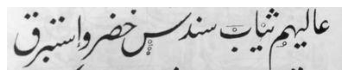

In [13]:
random_index = np.random.randint(0, 1683)

# Plot the image.
print(X[random_index].shape)
plt.imshow(X[random_index], 'gray')
plt.axis("off")

print("The ground-truth value of this image is: ",
      classes[Y[random_index]-1])

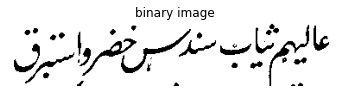

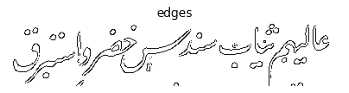

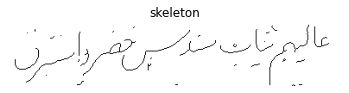

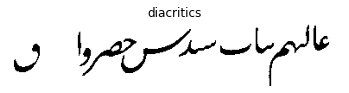

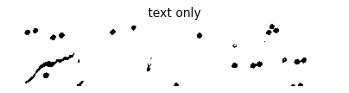

In [15]:
binaryImage = binraization(X[random_index])
edges, skeleton, textOnly, diacritics = extractImagesSet(binaryImage//255)

plt.imshow(binaryImage, 'gray')
plt.title('binary image')
plt.axis("off")
plt.show()


plt.imshow(edges, 'gray')
plt.title('edges')
plt.axis("off")
plt.show()

plt.imshow(skeleton, 'gray')
plt.title('skeleton')
plt.axis("off")
plt.show()

plt.imshow(diacritics, 'gray')
plt.title('diacritics')
plt.axis("off")
plt.show()

plt.imshow(textOnly, 'gray')
plt.title('text only')
plt.axis("off")
plt.show()

In [ ]:
features = np.zeros((X.shape[0], 756))
for i in range(X.shape[0]):
    X[i] = binraization(X[i])
    features[i] = extract_hog_features(X[i])

In [235]:
X_train, Y_train, X_valid, Y_valid, X_test, Y_test = split_data(features, Y)

In [236]:
X_train = torch.from_numpy(X_train)
print(X_train.shape)
Y_train = torch.from_numpy(Y_train)
print(Y_train.shape)
X_valid = torch.from_numpy(X_valid)
print(X_valid.shape)
Y_valid = torch.from_numpy(Y_valid)
print(Y_valid.shape)
X_test = torch.from_numpy(X_test)
print(X_test.shape)
Y_test = torch.from_numpy(Y_test)
print(Y_test.shape)

torch.Size([1010, 756])
torch.Size([1010])
torch.Size([337, 756])
torch.Size([337])
torch.Size([337, 756])
torch.Size([337])


Epoch: 1/200 Training Loss: 0.0022855069377634785 validation Loss: 0.006101797879272823 Test Loss: 0.006037241627271522
Epoch: 11/200 Training Loss: 0.0009863954369384463 validation Loss: 0.0025417040646606806 Test Loss: 0.002478307715509341
Epoch: 21/200 Training Loss: 0.0005732798930441979 validation Loss: 0.0016060388406589406 Test Loss: 0.0015112862035145745
Epoch: 31/200 Training Loss: 0.0003882676658063832 validation Loss: 0.0011595434534089856 Test Loss: 0.001145028395893312
Epoch: 41/200 Training Loss: 0.0002688417930414181 validation Loss: 0.000993969886168528 Test Loss: 0.0009549131909888293
Epoch: 51/200 Training Loss: 0.00019690401778362765 validation Loss: 0.0009151437162291756 Test Loss: 0.0009205135287446156
Epoch: 61/200 Training Loss: 0.00016313122935814433 validation Loss: 0.0008221579942222165 Test Loss: 0.0009005860334334104
Epoch: 71/200 Training Loss: 0.00013436388851392387 validation Loss: 0.0007897702982588409 Test Loss: 0.0009169864194683222
Epoch: 81/200 Train

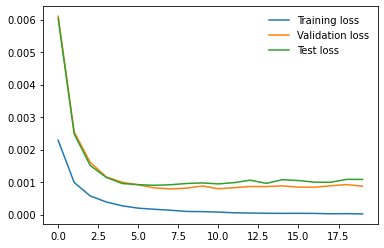

training accuracy = 100.0%
validation accuracy = 92.58160237388724%
test accuracy = 89.31750741839762%


In [237]:
from nn_utils import *

model = nn.Sequential(nn.Linear(756, 256),
                    nn.ReLU(),
                    nn.Dropout(0.6),
#                     nn.Linear(512, 256),
#                     nn.ReLU(),
#                     nn.Dropout(0.5),
                    nn.Linear(256, 10),
                    nn.LogSoftmax(dim=1))

train_losses, validation_losses, test_losses =\
    nn_train(model, X_train, Y_train, X_valid, Y_valid, X_test, Y_test, epochs=200, lr=0.01)

plt.plot(train_losses, label='Training loss')
plt.plot(validation_losses, label='Validation loss')
plt.plot(test_losses, label='Test loss')
plt.legend(frameon=False)
plt.show()

train_predictions = nn_predict(model, X_train)
validation_predictions = nn_predict(model, X_valid)
test_predictions = nn_predict(model, X_test)

print(f'training accuracy = {nn_accuracy(train_predictions, Y_train) * 100}%')
print(f'validation accuracy = {nn_accuracy(validation_predictions, Y_valid) * 100}%')
print(f'test accuracy = {nn_accuracy(test_predictions, Y_test) * 100}%')

In [238]:
from sklearn import svm, metrics

poly = svm.SVC(kernel = 'poly', C=1, degree=4, decision_function_shape='ovo').fit(X_train, Y_train)

train_predictions = poly.predict(X_train)
validation_predictions = poly.predict(X_valid)
test_predictions = poly.predict(X_test)

print(f'training accuracy = {metrics.accuracy_score(Y_train, train_predictions) * 100}%')
print(f'validation accuracy = {metrics.accuracy_score(Y_valid, validation_predictions) * 100}%')
print(f'test accuracy = {metrics.accuracy_score(Y_test, test_predictions) * 100}%')

training accuracy = 100.0%
validation accuracy = 92.87833827893175%
test accuracy = 91.0979228486647%
